## Gathering Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

file_path = "D:\ADS_Group9\datasets/v1_cleaned_messied_dataset.csv"
df = pd.read_csv(file_path)
print(df.head())

   2017.NAICS.Code                                   2017.NAICS.Title  \
0              NaN  Plastics Materials and Basic Forms and Shapes ...   
1              NaN           Translation and Interpretation Services!   
2              NaN                                    Dance Companie%   
3              NaN       Other Chemical and Fertilizer Mineral Mining   
4              NaN                                  Silver Ore Mining   

        GHG                               Unit  \
0  All GHGs  kg CO2e/2022 USD, purchaser price   
1  All GHGs  kg CO2e/2022 USD, purchaser price   
2  All GHGs  kg CO2e/2022 USD, purchaser price   
3  All GHGs  kg CO2e/2022 USD, purchaser price   
4  All GHGs  kg CO2e/2022 USD, purchaser price   

  Supply.Chain.Emission.Factors.without.Margins  \
0                                         0.144   
1                                          0.08   
2                                         0.086   
3                                         0.184   
4    

## Cleaning

In [7]:
#Checking for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df = df.drop_duplicates()

Number of duplicate rows: 0


In [8]:
#Clean the 2017.NAICS.Code column: remove all empty values and make strings with no decimals
def clean_naics_code(value):
    try:
        return str(int(float(value))) if pd.notna(value) and str(value).strip() not in ["", "nan"] else np.nan
    except ValueError:
        return np.nan 

df["2017.NAICS.Code"] = df["2017.NAICS.Code"].apply(clean_naics_code)
print(df["2017.NAICS.Code"].unique()[:10])

[nan '111110' '111120' '111130' '111150' '111160' '111191' '111199'
 '111211' '111219']


In [9]:
# Ensure all items in 2017.NAICS.Title are clean strings
df["2017.NAICS.Title"] = df["2017.NAICS.Title"].astype(str).str.strip().str.title()

print(df["2017.NAICS.Title"].unique()[:10])

['Plastics Materials And Basic Forms And Shapes Merchant Wholesalers'
 'Translation And Interpretation Services!' 'Dance Companie%'
 'Other Chemical And Fertilizer Mineral Mining' 'Silver Ore Mining'
 'Farm Management Services'
 'Ornamental And Architectural Metal Work Manufacturing!'
 'Geophysical Surveying And Mapping Services!'
 'Bare Printed Circuit Board Manufacturing'
 'Pipeline Transportation Of Crude Oil']


In [10]:
#Clean the Reference.USEEIO.Code column. Remove any special characters and add leading zeros if it does not have 5 digits.  
def clean_reference_code(code):
    cleaned_code = re.sub(r'\D', '', str(code))  # Remove special characters
    return cleaned_code.zfill(5) if cleaned_code else ""

df["Reference.USEEIO.Code"] = df["Reference.USEEIO.Code"].apply(clean_reference_code)
print(df["Reference.USEEIO.Code"].head())

0     04240
1     54190
2    711100
3     02123
4     02122
Name: Reference.USEEIO.Code, dtype: object


In [11]:
#Ensure all elements of Margins.of.Supply.Chain.Emission.Factors and Supply.Chain.Emission.Factors.with.Margins are numeric
num_cols = [
    "Margins.of.Supply.Chain.Emission.Factors",
    "Supply.Chain.Emission.Factors.with.Margins"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  

print("Updated Data Types:")
print(df.dtypes)

Updated Data Types:
2017.NAICS.Code                                   object
2017.NAICS.Title                                  object
GHG                                               object
Unit                                              object
Supply.Chain.Emission.Factors.without.Margins     object
Margins.of.Supply.Chain.Emission.Factors         float64
Supply.Chain.Emission.Factors.with.Margins       float64
Reference.USEEIO.Code                             object
dtype: object


In [12]:
print("Data after cleaning:")
print(df.head())

Data after cleaning:
  2017.NAICS.Code                                   2017.NAICS.Title  \
0             NaN  Plastics Materials And Basic Forms And Shapes ...   
1             NaN           Translation And Interpretation Services!   
2             NaN                                    Dance Companie%   
3             NaN       Other Chemical And Fertilizer Mineral Mining   
4             NaN                                  Silver Ore Mining   

        GHG                               Unit  \
0  All GHGs  kg CO2e/2022 USD, purchaser price   
1  All GHGs  kg CO2e/2022 USD, purchaser price   
2  All GHGs  kg CO2e/2022 USD, purchaser price   
3  All GHGs  kg CO2e/2022 USD, purchaser price   
4  All GHGs  kg CO2e/2022 USD, purchaser price   

  Supply.Chain.Emission.Factors.without.Margins  \
0                                         0.144   
1                                          0.08   
2                                         0.086   
3                                        

## Exploratory Data Analysis (EDA)

In [13]:
# Display general information about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['object']))

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017.NAICS.Code                                1072 non-null   object 
 1   2017.NAICS.Title                               1087 non-null   object 
 2   GHG                                            1087 non-null   object 
 3   Unit                                           1087 non-null   object 
 4   Supply.Chain.Emission.Factors.without.Margins  1084 non-null   object 
 5   Margins.of.Supply.Chain.Emission.Factors       1077 non-null   float64
 6   Supply.Chain.Emission.Factors.with.Margins     1077 non-null   float64
 7   Reference.USEEIO.Code                          1087 non-null   object 
dtypes: float64(2), object(6)
memory usage: 68.1+ KB
None
       Margins.of.Supply.Chain.Emission.Factors  \
count                    

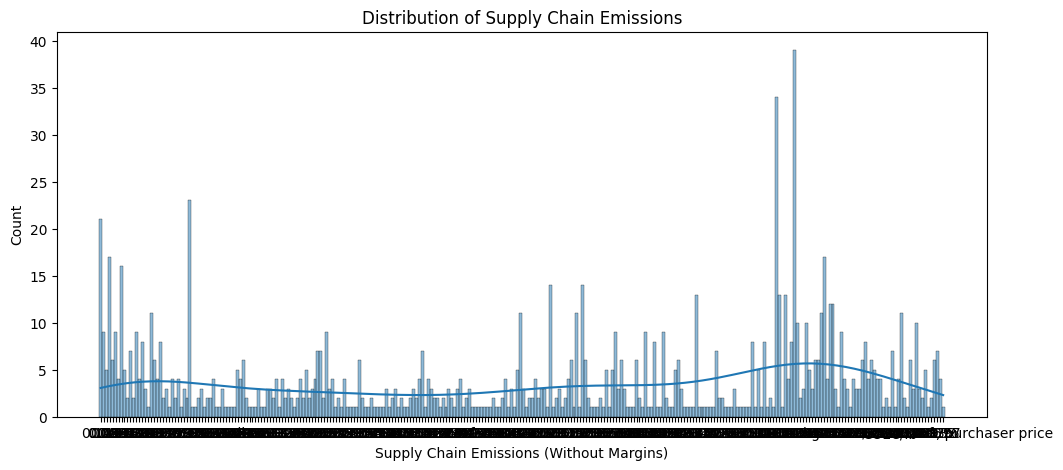

In [15]:
# Plot distribution of emissions
plt.figure(figsize=(12, 5))
sns.histplot(df["Supply.Chain.Emission.Factors.without.Margins"], bins=50, kde=True)
plt.xlabel("Supply Chain Emissions (Without Margins)")
plt.title("Distribution of Supply Chain Emissions")
plt.show()

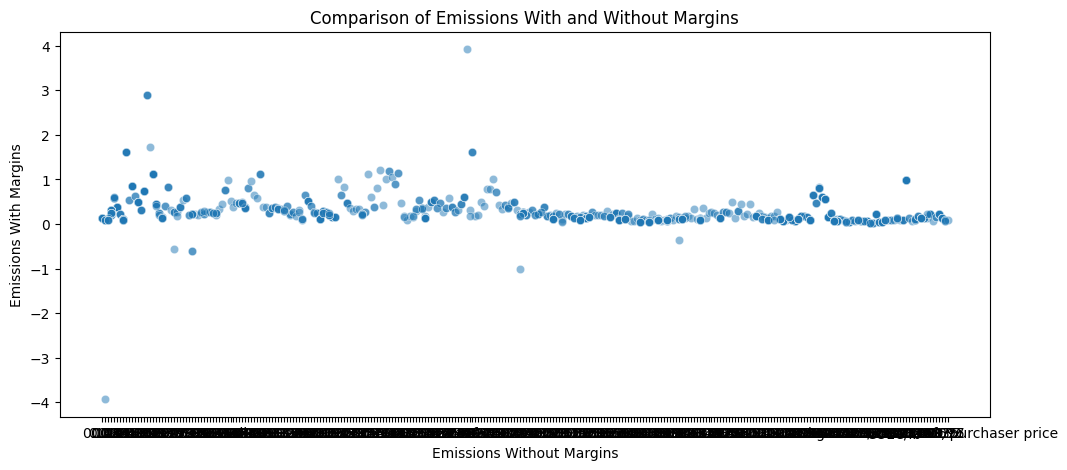

In [16]:
# Compare "without margins" vs. "with margins"
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x=df["Supply.Chain.Emission.Factors.without.Margins"], 
    y=df["Supply.Chain.Emission.Factors.with.Margins"], 
    alpha=0.5
)
plt.xlabel("Emissions Without Margins")
plt.ylabel("Emissions With Margins")
plt.title("Comparison of Emissions With and Without Margins")
plt.show()

In [18]:
# Identify top industries with highest emissions
top_emitters = df.groupby("2017.NAICS.Title")["Supply.Chain.Emission.Factors.with.Margins"].sum()
top_emitters = top_emitters.sort_values(ascending=False).head(10)
print(top_emitters)

2017.NAICS.Title
Cement Manufacturin%                        3.924
Beef Cattle Ranching And Farming            2.893
Dual-Purpose Cattle Ranching And Farmin%    2.893
Cattle Feedlots                             2.893
Dairy Cattle And Milk Production            1.724
Lime Manufacturing                          1.623
Pipeline Transportation Of Natural Ga%      1.620
Gypsum Product Manufacturing%               1.620
Gypsum Product Manufacturing                1.620
Pipeline Transportation Of Natural Gas      1.620
Name: Supply.Chain.Emission.Factors.with.Margins, dtype: float64


C:\Users\凡曲\AppData\Local\Temp\ipykernel_52072\276248430.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="Reds_r")


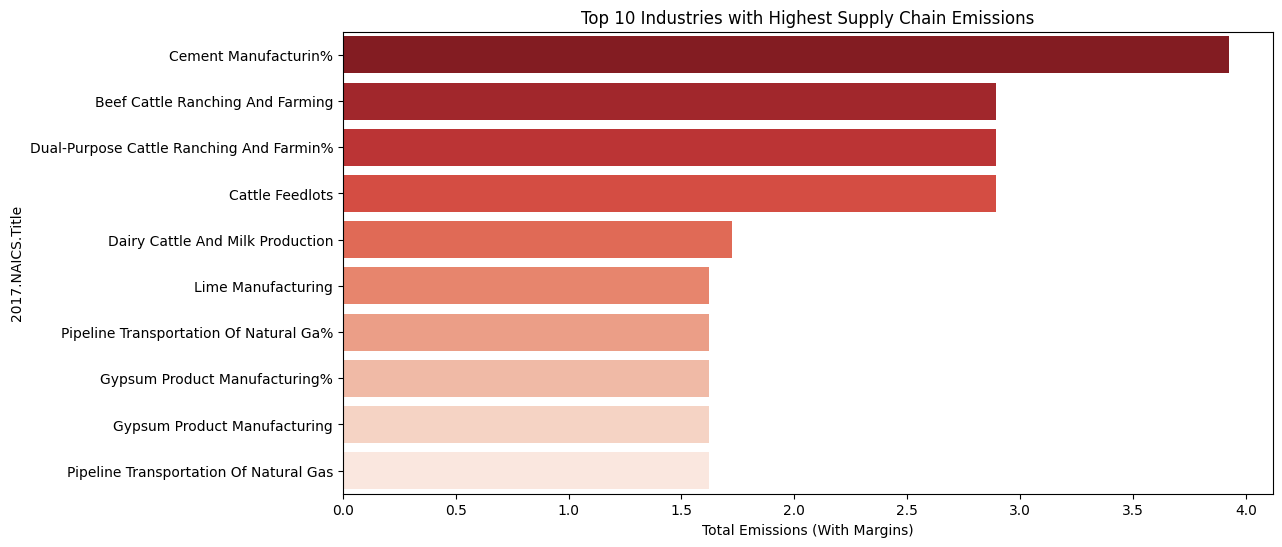

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_emitters.values, y=top_emitters.index, palette="Reds_r")
plt.xlabel("Total Emissions (With Margins)")
plt.title("Top 10 Industries with Highest Supply Chain Emissions")
plt.show()

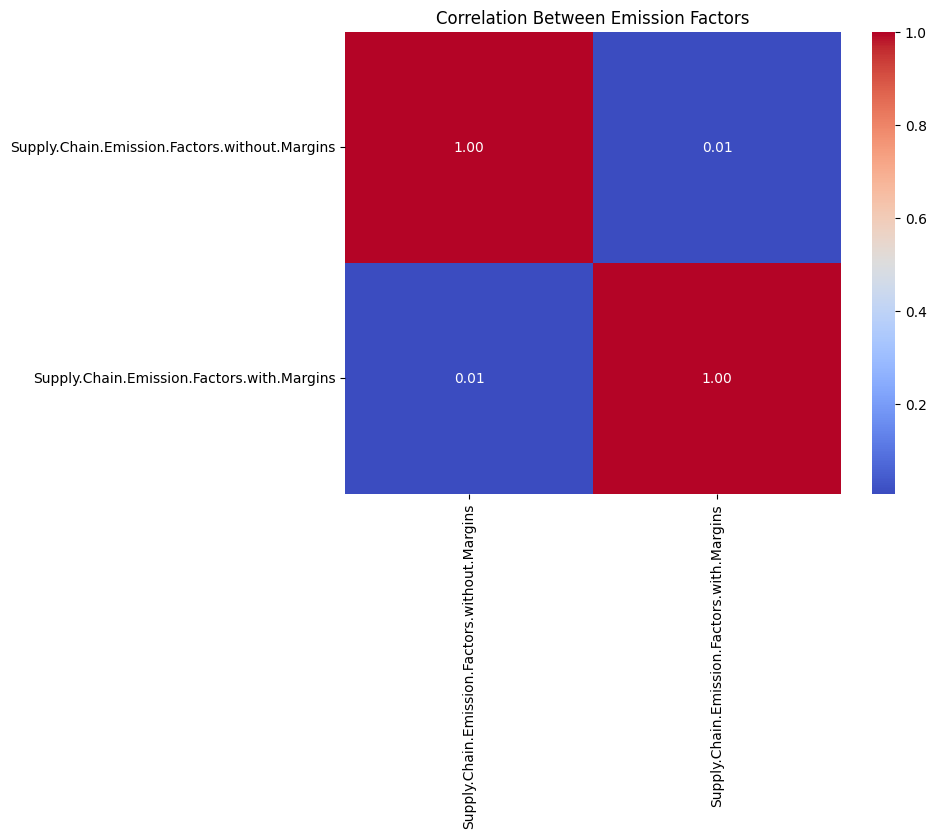

In [27]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Supply.Chain.Emission.Factors.without.Margins','Supply.Chain.Emission.Factors.with.Margins']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Emission Factors")
plt.show()